<a href="https://colab.research.google.com/github/marmik599/Marmik-Shah/blob/master/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
path = 'https://raw.githubusercontent.com/umangkejriwal1122/Machine-Learning/master/Data%20Sets/covid_19_clean_complete.csv'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #### data visualization
import plotly.express as px  ### plotting the data on world map

In [7]:
df = pd.read_csv(path)
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
32060,NaN,Sao Tome and Principe,0.186360,6.613081,5/21/20,251,8,4
32061,NaN,Yemen,15.552727,48.516388,5/21/20,197,33,0
32062,NaN,Comoros,-11.645500,43.333300,5/21/20,34,1,8
32063,NaN,Tajikistan,38.861034,71.276093,5/21/20,2350,44,0
32064,NaN,Lesotho,-29.609988,28.233608,5/21/20,1,0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  9680 non-null   object 
 1   Country/Region  32065 non-null  object 
 2   Lat             32065 non-null  float64
 3   Long            32065 non-null  float64
 4   Date            32065 non-null  object 
 5   Confirmed       32065 non-null  int64  
 6   Deaths          32065 non-null  int64  
 7   Recovered       32065 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 2.0+ MB


In [0]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  9680 non-null   object        
 1   Country/Region  32065 non-null  object        
 2   Lat             32065 non-null  float64       
 3   Long            32065 non-null  float64       
 4   Date            32065 non-null  datetime64[ns]
 5   Confirmed       32065 non-null  int64         
 6   Deaths          32065 non-null  int64         
 7   Recovered       32065 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


In [12]:
df.drop(['Province/State'],axis=1,inplace=True)
df.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [13]:
df.rename(columns={"Country/Region":"Country"},inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
active=df['Confirmed'] -df['Recovered'] - df['Deaths']
df['Active']=active

In [15]:
df.tail()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
32060,Sao Tome and Principe,0.186360,6.613081,2020-05-21,251,8,4,239
32061,Yemen,15.552727,48.516388,2020-05-21,197,33,0,164
32062,Comoros,-11.645500,43.333300,2020-05-21,34,1,8,25
32063,Tajikistan,38.861034,71.276093,2020-05-21,2350,44,0,2306
32064,Lesotho,-29.609988,28.233608,2020-05-21,1,0,0,1


In [17]:
top=df[df['Date']==df['Date'].max()]
top.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
31800,Afghanistan,33.0000,65.0000,2020-05-21,8676,193,938,7545
31801,Albania,41.1533,20.1683,2020-05-21,969,31,771,167
31802,Algeria,28.0339,1.6596,2020-05-21,7728,575,4062,3091
31803,Andorra,42.5063,1.5218,2020-05-21,762,51,639,72
31804,Angola,-11.2027,17.8739,2020-05-21,58,3,17,38


In [18]:
world=top.groupby('Country')['Confirmed','Deaths','Recovered','Active'].sum()
world=world.reset_index()
world.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,8676,193,938,7545
1,Albania,969,31,771,167
2,Algeria,7728,575,4062,3091
3,Andorra,762,51,639,72
4,Angola,58,3,17,38


In [21]:
#### Plot on World Map (Active Cases)
figure = px.choropleth(world,locations='Country',locationmode='country names',
                       color='Active',range_color=[1,10000],
                       ,color_continuous_scale='rainbow',title='World Map Plot')
figure.show()

In [22]:
#### Plot WorldWide Confirmed Cases Over Data
total_confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
total_confirmed.tail()

,Date,Confirmed
116,2020-05-17,4713614
117,2020-05-18,4801937
118,2020-05-19,4897486
119,2020-05-20,4996466
120,2020-05-21,5102418


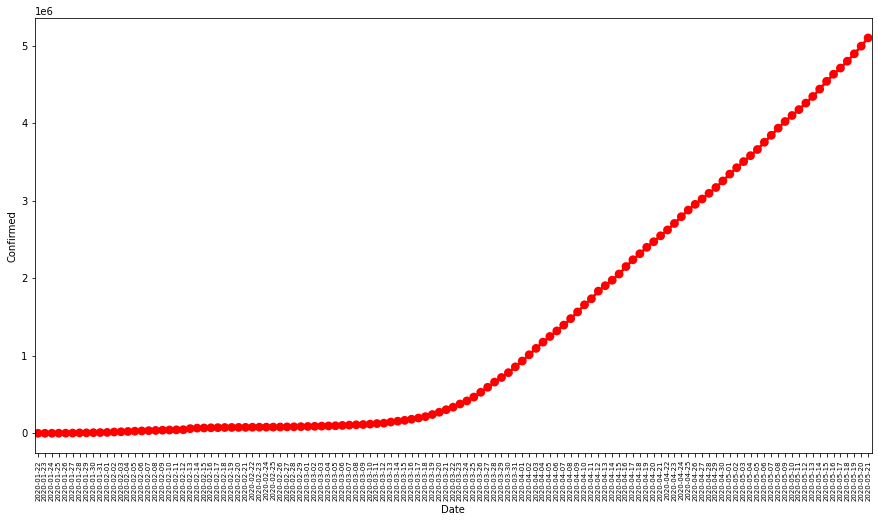

In [23]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90,fontsize=7)
sns.pointplot(total_confirmed['Date'].dt.date,total_confirmed['Confirmed']
                  ,color='red')
plt.show()

In [24]:
##### Top 20 Countries having most number of Active Cases
top_actives = top.groupby('Country')['Active'].sum().sort_values(ascending=False)
top_actives = top_actives.reset_index()
top_actives.head()


,Country,Active
0,US,1184027
1,Russia,221774
2,United Kingdom,214988
3,Brazil,164080
4,France,89757


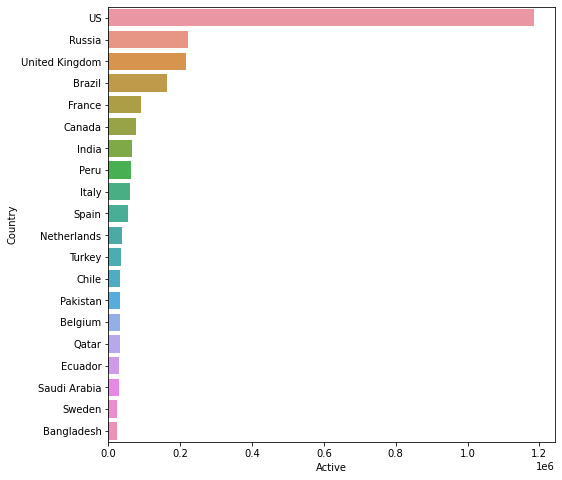

In [26]:

top_20 = top_actives.head(20)
top_20
plt.figure(figsize=(8,8))
sns.barplot(top_20['Active'],top_20['Country'])
plt.show()